# Multi-armed bandit
### Thompson sampling with success probability constraint and stochastic rewards

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [21]:
#data = np.load('RESULTS/rew_event_prob_olla_6_dB.npy')[()]

data = np.load('RESULTS/RESULTS_OLLA_5dB.npy')[()]
#data = np.load('RESULTS/RESULTS_OLLA_6dB.npy')[()]
#data = np.load('RESULTS/RESULTS_OLLA_9dB.npy')[()]
#data = np.load('RESULTS/RESULTS_OLLA_10dB.npy')[()]
#data = np.load('RESULTS/RESULTS_OLLA_12dB.npy')[()]
#data = np.load('RESULTS/RESULTS_OLLA_15dB.npy')[()]

#data = np.load('RESULTS/RESULTS_OLLA_NONSTATIONARY.npy')[()]

T = data['T']
target_success_prob = data['target_success_prob']

In [22]:
print(data.keys())

dict_keys(['oracle_avg_success', 'oracle_avg_reward', 'con_ts_avg_success', 'con_ts_avg_reward', 'con_ts_infp_avg_success', 'con_ts_infp_avg_reward', 'olla_avg_success', 'olla_avg_reward', 'target_success_prob', 'T', 'N'])


In [23]:
#olla_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['olla_avg_reward']))
#con_ts_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['ts_avg_reward']))
#con_ts_infp_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['ts_infp_avg_reward']))

#olla_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['olla_avg_reward_events']))
#con_ts_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['ts_avg_reward_events']))
#con_ts_infp_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['ts_infp_avg_reward_events']))

#sampling_interval = 1000

In [24]:
olla_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['olla_avg_reward']))
con_ts_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['con_ts_avg_reward']))
con_ts_infp_cum_regret = np.cumsum(np.maximum(0.0, data['oracle_avg_reward'] - data['con_ts_infp_avg_reward']))

olla_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['olla_avg_success']))
con_ts_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['con_ts_avg_success']))
con_ts_infp_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['con_ts_infp_avg_success']))

sampling_interval = 1000

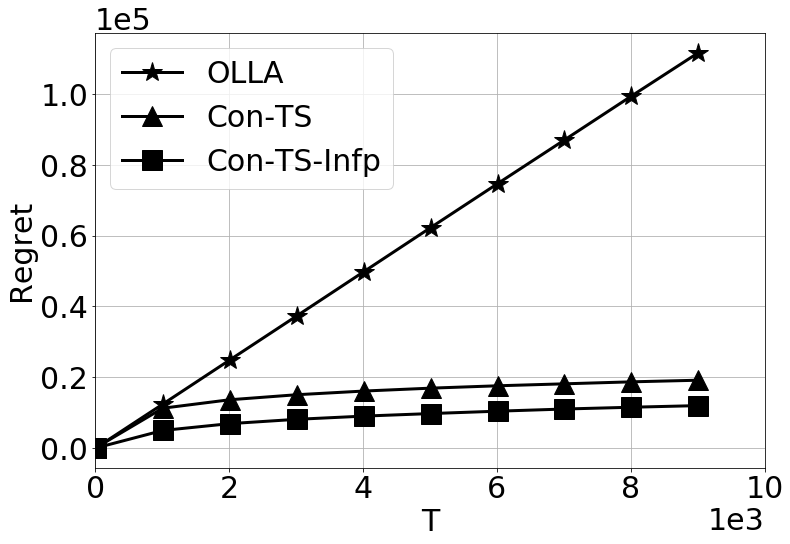

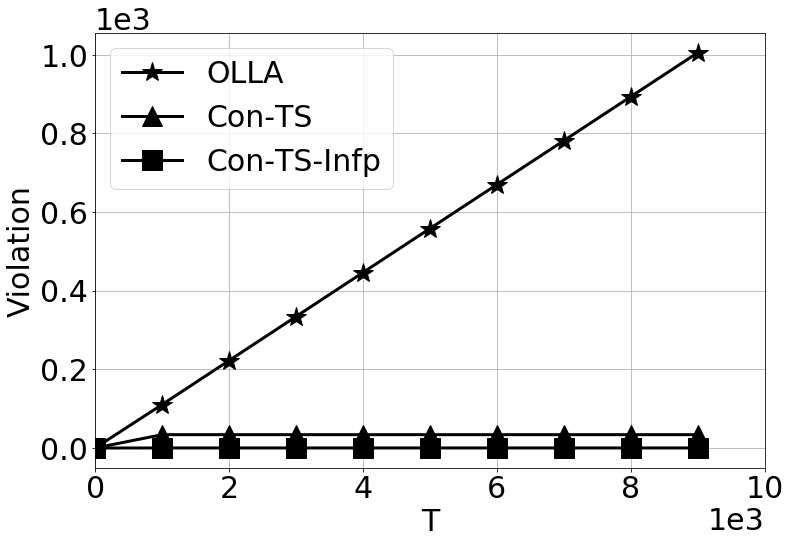

In [16]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

#------------------------------------
# Cum. Regret
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])

offset = 10
x_ticks = np.arange(offset, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks[samples], olla_cum_regret[samples], 'k-*')
plt.plot(x_ticks[samples], con_ts_cum_regret[samples], 'k-^')
plt.plot(x_ticks[samples], con_ts_infp_cum_regret[samples], 'k-s')

plt.legend(['OLLA', 'Con-TS', 'Con-TS-Infp'], loc='upper left')
plt.xlabel('T')
plt.ylabel('Regret')

plt.show()

#------------------------------------
# Cum. Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 5000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks[samples], olla_cum_violation[samples], 'k-*')
plt.plot(x_ticks[samples], con_ts_cum_violation[samples], 'k-^')
plt.plot(x_ticks[samples], con_ts_infp_cum_violation[samples], 'k-s')

plt.legend(['OLLA', 'Con-TS', 'Con-TS-Infp'], loc='upper left')
plt.xlabel('T')
plt.ylabel('Violation')

plt.show()

# Non-stationary Environment

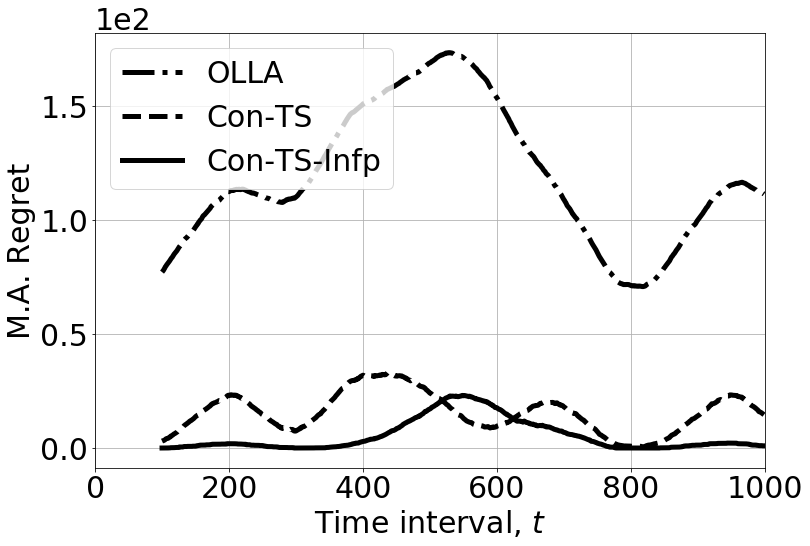

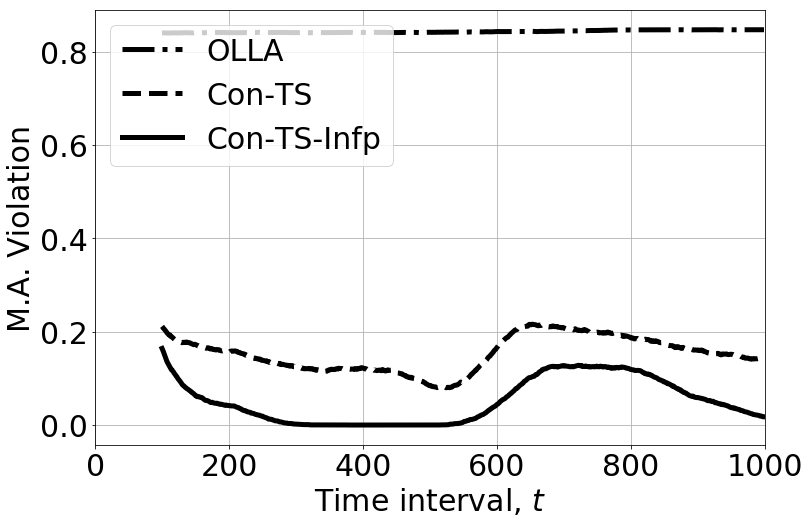

In [52]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 5,
                     'lines.markersize': 20})

def movavg(cumsum, win_size=100):
    return (cumsum[win_size:] - cumsum[:-1 * win_size]) / win_size

#------------------------------------
# Mov. Avg. Regret
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim([0, T])

x_ticks = np.arange(100, T)
samples = np.arange(100, T)

plt.plot(x_ticks, movavg(olla_cum_regret), 'k-.')
plt.plot(x_ticks, movavg(con_ts_cum_regret), 'k--')
plt.plot(x_ticks, movavg(con_ts_infp_cum_regret), 'k-')

plt.legend(['OLLA', 'Con-TS', 'Con-TS-Infp'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('M.A. Regret')

plt.show()

#------------------------------------
# Mov. Avg. Violation
#------------------------------------

def movavg(cumsum, win_size=100):
    return (cumsum[win_size:] - cumsum[:-1 * win_size]) / win_size

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim([0, T])

x_ticks = np.arange(100, T)

plt.plot(x_ticks, movavg(olla_cum_violation), 'k-.')
plt.plot(x_ticks, movavg(con_ts_cum_violation), 'k--')
plt.plot(x_ticks, movavg(con_ts_infp_cum_violation), 'k-')

plt.legend(['OLLA', 'Con-TS', 'Con-TS-Infp'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('M.A. Violation')

plt.show()

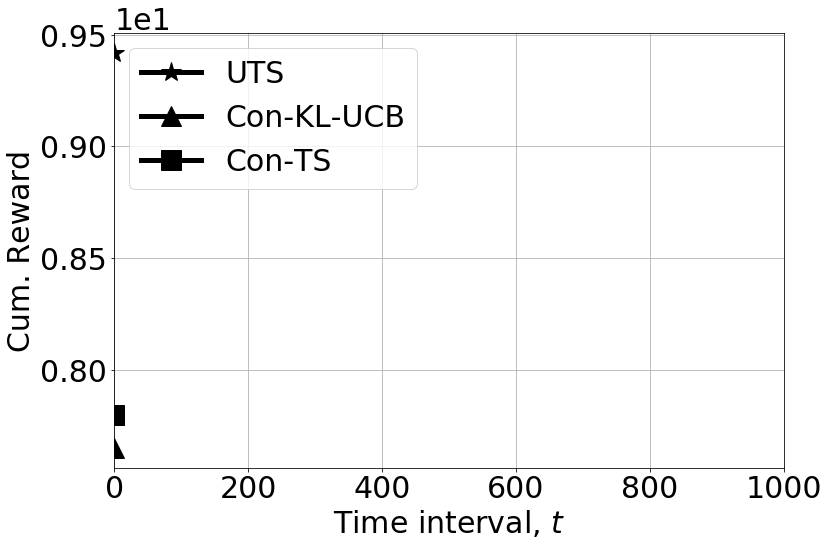

In [124]:
#------------------------------------
# Cum. Reward
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, 1000)

plt.plot(x_ticks[samples], uts_cum_reward[samples], 'k-*')
plt.plot(x_ticks[samples], con_kl_ucb_cum_reward[samples], 'k-^')
plt.plot(x_ticks[samples], con_ts_cum_reward[samples], 'k-s')

plt.legend(['UTS', 'Con-KL-UCB', 'Con-TS'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('Cum. Reward')

plt.show()

# Plot stuff

Text(0, 0.5, 'Average Reward Events  $E[x_{k(t)}]$')

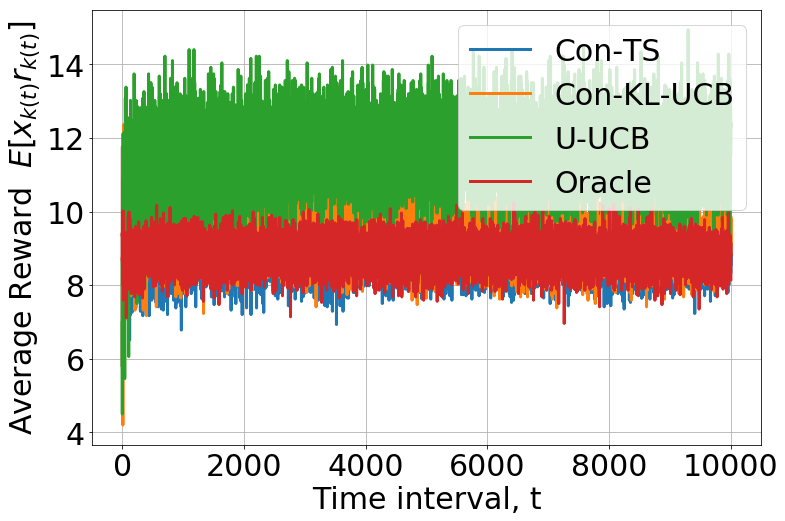

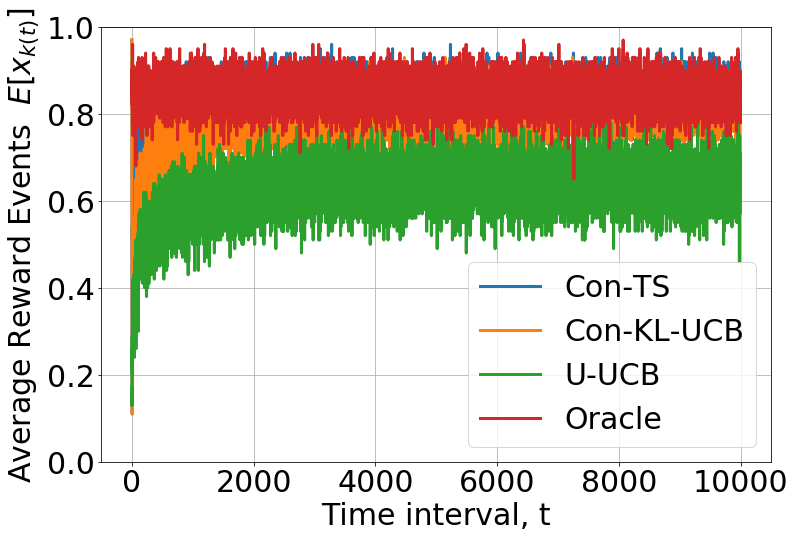

In [97]:
plt.figure(figsize=[12, 8])
plt.grid(True)

plt.plot(data['ts_avg_reward'])
plt.plot(data['ucb_avg_reward'])
plt.plot(data['u_ucb_avg_reward'])
plt.plot(data['oracle_avg_reward'])

plt.legend(['Con-TS', 'Con-KL-UCB', 'U-UCB', 'Oracle'])

#plt.ylim([0.0, 1])
plt.xlabel('Time interval, t')
plt.ylabel('Average Reward  $E[x_{k(t)}r_{k(t)}]$')


plt.figure(figsize=[12, 8])
plt.grid(True)

plt.plot(data['ts_avg_reward_events'])
plt.plot(data['ucb_avg_reward_events'])
plt.plot(data['u_ucb_avg_reward_events'])
plt.plot(data['oracle_avg_reward_events'])

plt.legend(['Con-TS', 'Con-KL-UCB', 'U-UCB', 'Oracle'])

plt.ylim([0, 1])
plt.xlabel('Time interval, t')
plt.ylabel('Average Reward Events  $E[x_{k(t)}]$')